<a href="https://colab.research.google.com/github/RoseSarlake/deep-learning/blob/main/DL_exe5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
#!pip install -U imbalanced-learn

In [116]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from collections import Counter

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep learning/Imbalanced_data.csv',names=["x", "y", "label"])
data.head()

,x,y,label
0,0.222014,0.540207,0.0
1,1.347439,1.412824,0.0
2,0.537238,0.372730,0.0
3,2.134462,1.404819,0.0
4,2.315827,1.356858,0.0


In [6]:
data.label.value_counts()

0.0    9900
1.0     100
Name: label, dtype: int64

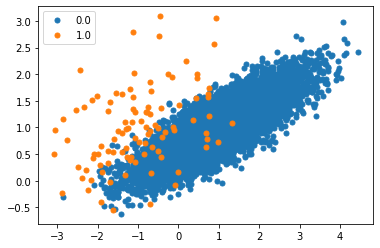

In [24]:
groups = data.groupby('label')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=5, label=name)
plt.legend()

1. SMOTE

In [103]:
a = np.array(data.x)
b = np.array(data.y)
co = np.array(list(zip(*[a, b])))

In [109]:
oversample = SMOTE()
X, y= oversample.fit_resample(co,data.label)

In [110]:
counter = Counter(y)
print(counter)

Counter({0.0: 9900, 1.0: 9900})


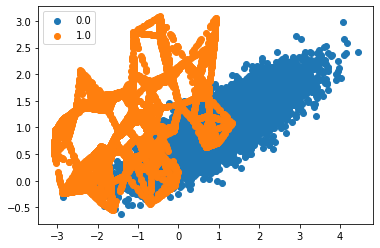

In [111]:
for tag, num in counter.items():
	i = np.where(y == tag)[0]
	plt.scatter(X[i, 0], X[i, 1], label=str(tag))
plt.legend()
plt.show()

2. Borderline-SMOTE

In [113]:
oversample = BorderlineSMOTE()
X, y= oversample.fit_resample(co,data.label)
counter = Counter(y)
print(counter)

Counter({0.0: 9900, 1.0: 9900})


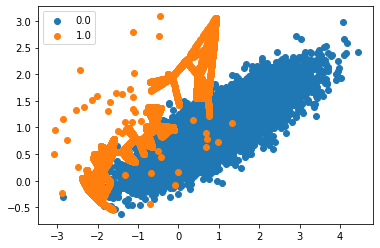

In [114]:
for tag, num in counter.items():
	i = np.where(y == tag)[0]
	plt.scatter(X[i, 0], X[i, 1], label=str(tag))
plt.legend()
plt.show()

3. ADASYN

In [119]:
oversample = ADASYN()
X, y= oversample.fit_resample(co,data.label)
counter = Counter(y)
print(counter)

Counter({0.0: 9900, 1.0: 9899})


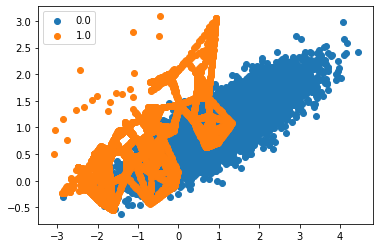

In [120]:
for tag, num in counter.items():
	i = np.where(y == tag)[0]
	plt.scatter(X[i, 0], X[i, 1], label=str(tag))
plt.legend()
plt.show()